1. Logistic Regression
2. Decision Tree
3. Random Forest
4. LightGBM
5. 4개의 모델 결과 비교

In [1]:
data = pd.read_csv('htn_dm2.csv')
data.head()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
0,1,1,116,78,94,4,16.6,38,0,0
1,1,1,100,60,79,4,22.3,40,0,0
2,1,1,100,60,87,4,21.9,40,0,0
3,1,1,111,70,72,4,20.2,41,0,0
4,1,1,120,80,98,4,20.0,40,0,0


In [2]:
data.shape

(968773, 10)

In [3]:
features = data[['sex','age','fbs','bmi','ppr']]
y = data['htn']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, stratify = y, random_state= 2045)

print('train data : ', x_train.shape, y_train.shape)
print('test data : ', x_test.shape, y_test.shape)

train data :  (678141, 5) (678141,)
test data :  (290632, 5) (290632,)


In [5]:
from imblearn.combine._smote_tomek import SMOTETomek

x_train_st, y_train_st = SMOTETomek().fit_sample(x_train, y_train)
print(x_train_st.shape)
print(y_train_st.value_counts())

(1038624, 5)
1    519312
0    519312
Name: htn, dtype: int64


## 1. Logistic Regression

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train_st)
x_test1 = scaler.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train1, y_train_st)

LogisticRegression()

In [8]:
import numpy as np

y_pred = model.predict(x_test1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = np.round(accuracy_score(y_test,y_pred), 2)
precision = np.round(precision_score(y_test, y_pred,pos_label = 1), 2)
recall = np.round(recall_score(y_test, y_pred,pos_label = 1), 2)
f1 = np.round(f1_score(y_test, y_pred, pos_label = 1),2)

print('정확도 : {0}, 정밀도 : {1}, 재현율 : {2}'.format(accuracy, precision, recall))


정확도 : 0.76, 정밀도 : 0.45, 재현율 : 0.78


In [9]:
log_ac = accuracy
log_pr = precision
log_re = recall
log_f1 = f1

## 2. Decision Tree

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
parameters = {'max_depth':[3,5,7,9,11], 'min_samples_split':[2,4,6,8], 'min_samples_leaf' : [3,5,7,9,11]}

In [11]:
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

In [12]:
grid_dtree.fit(x_train_st, y_train_st)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 7, 9, 11],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True)

In [13]:
grid_dtree.best_params_

{'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred = grid_dtree.predict(x_test)
accuracy_score(y_test, pred)

estimator = grid_dtree.best_estimator_
pred = estimator.predict(x_test)
accuracy = np.round(accuracy_score(y_test,pred), 2)
precision = np.round(precision_score(y_test, pred,pos_label = 1), 2)
recall = np.round(recall_score(y_test, pred,pos_label = 1), 2)
f1 = np.round(f1_score(y_test, pred, pos_label = 1),2)

print('정확도 : {0}, 정밀도 : {1}, 재현율 : {2}'.format(accuracy, precision, recall))


정확도 : 0.74, 정밀도 : 0.43, 재현율 : 0.8


In [15]:
dtree_ac = accuracy
dtree_pr = precision
dtree_re = recall
dtree_f1 = f1

## 3. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
Model_rf = RandomForestClassifier(max_depth = 10,
                                  min_samples_leaf = 5,  
                                  min_samples_split = 8,  
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(x_train_st, y_train_st)
pred_rf = Model_rf.predict(x_test)
accuracy = np.round(accuracy_score(y_test,pred_rf), 2)
precision = np.round(precision_score(y_test, pred_rf,pos_label = 1), 2)
recall = np.round(recall_score(y_test, pred_rf,pos_label = 1), 2)
f1 = np.round(f1_score(y_test, pred_rf, pos_label = 1),2)

print('정확도 : {0}, 정밀도 : {1}, 재현율 : {2}'.format(accuracy, precision, recall))

정확도 : 0.74, 정밀도 : 0.44, 재현율 : 0.81


In [18]:
rf_ac = accuracy
rf_pr = precision
rf_re = recall
rf_f1 = f1

## 4. LightGBM

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import numpy as np

In [20]:
model_lgbm = LGBMClassifier(n_estimators=400,num_leaves=15,max_depth=20,min_child_samples=40, n_jobs=-1,boost_from_average=False)
model_lgbm.fit(x_train_st, y_train_st)

LGBMClassifier(boost_from_average=False, max_depth=20, min_child_samples=40,
               n_estimators=400, num_leaves=15)

In [21]:
y_pred_lgbm = model_lgbm.predict(x_test)

In [22]:
print('정확도 = ', np.round(accuracy_score(y_test, y_pred_lgbm),2))
print('정밀도 = ',np.round(precision_score(y_test, y_pred_lgbm, pos_label = 1),2))
print('재현율 = ', np.round(recall_score(y_test, y_pred_lgbm, pos_label = 1),2))
print('f1 score = ', np.round(f1_score(y_test, y_pred_lgbm, pos_label = 1),2))

정확도 =  0.79
정밀도 =  0.5
재현율 =  0.66
f1 score =  0.57


In [23]:
lgbm_ac = np.round(accuracy_score(y_test, y_pred_lgbm),2)
lgbm_pr = np.round(precision_score(y_test, y_pred_lgbm, pos_label = 1),2)
lgbm_re = np.round(recall_score(y_test, y_pred_lgbm, pos_label = 1),2)
lgbm_f1 = np.round(f1_score(y_test, y_pred_lgbm, pos_label = 1),2)

## 5. 정확도, 정밀도, 재현율, f1-score 비교

In [24]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [27]:
list_ac = [log_ac, dtree_ac, rf_ac, lgbm_ac]
list_pr = [log_pr, dtree_pr, rf_pr, lgbm_pr]
list_rer = [log_re, dtree_re, rf_re, lgbm_re]
list_f1 = [log_f1, dtree_f1, rf_f1, lgbm_f1]

In [25]:
x_list = ['logistic', 'decision_tree', 'random_forest', 'lgbm']

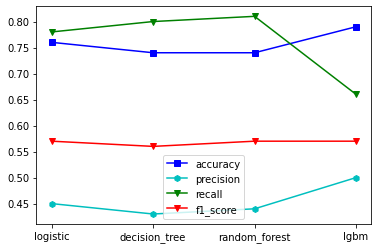

In [28]:
plt.plot(x_list, list_ac, marker='s',color='b',label='accuracy')	
plt.plot(x_list, list_pr, marker='h',color='c', label='precision')
plt.plot(x_list, list_rer, marker='v',color='g', label='recall')
plt.plot(x_list, list_f1, marker='v',color='r', label='f1_score')
plt.legend()
#plt.savefig('result.png')